<a href="https://colab.research.google.com/github/silverstar0727/n_body_problem/blob/master/modeling_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://pastebin.com/44zuYwGP

In [ ]:
# 라이브러리 임포트
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation as an

In [ ]:
# model 함수 생성

def model(x, t, m1, m2, m3):
    # Unpacking positions
    r1 = x[0:3]
    r2 = x[3:6]
    r3 = x[6:9]
 
    # Unpacking velocities
    v1 = x[9:12]
    v2 = x[12:15]
    v3 = x[15:18]
 
    # Constants
    G = 6.67408e-10
 
    # Calculating derivatives
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)
 
    out         = np.zeros(18)
    out[0:3]    = K2*v1
    out[3:6]    = K2*v2
    out[6:9]    = K2*v3
    out[9:12]   = K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    out[12:15]  = K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    out[15:18]  = K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
 
    return out
 

In [ ]:

 
# Reference quantities
m_nd = 1.989e+30                # mass of sun                               [kg]
r_nd = 5.326e+12                # Distance between stars in Alpha Centauri  [m]
v_nd = 30000                    # Relative velocity of earth around the sun [m/s]
t_nd = 79.91*365*24*3600*0.51   # Orbital period of Alpha Centauri          [s]
 
# Constants
G = 6.67408e-10
K1 = G*t_nd*m_nd/((r_nd ** 2)*v_nd)
K2 = v_nd*t_nd/r_nd
 
## Parameters and initial conditions
# Planet masses: x times the mass of the sun
m1          = 1.1       # Planet A
m2          = 0.907     # Planet B
m3          = 1.0       # Planet C
 
# Define initial positions
r1 = np.array([-0.5, 0.0, 0.0])     # [m]
r2 = np.array([0.5, 0.0, 0.0])      # [m]
r3 = np.array([0.0, 1.0, 0.0])      # [m]
 
# Define initial velocities
v1 = np.array([0.01, 0.01, 0.0])    # [m/s]
v2 = np.array([-0.05, 0.0, -0.1])   # [m/s]
v3 = np.array([0.2, -0.01, 0.0])    # [m/s]
 
# Initial conditions
x0          = np.zeros(18)
x0[0:9]     = np.concatenate((r1, r2, r3))
x0[9:18]    = np.concatenate((v1, v2, v3))
 
## Integrating ODE
tf = 5
n = 500
t = np.linspace(0, tf, num = n)
Three_Body_Sol = odeint(model, x0, t, args=(m1, m2, m3,))
 
r1_sol = Three_Body_Sol[:, 0:3]
r2_sol = Three_Body_Sol[:, 3:6]
r3_sol = Three_Body_Sol[:, 6:9]

In [ ]:
## Plotting
# Animation function
def update_points(i):
    # Updating orbits
    planet1_orbit.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    planet1_orbit.set_3d_properties(r1_sol[:i, 2], 'z')
 
    planet2_orbit.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    planet2_orbit.set_3d_properties(r2_sol[:i:, 2], 'z')
 
    planet3_orbit.set_data(r3_sol[:i, 0], r3_sol[:i, 1])
    planet3_orbit.set_3d_properties(r3_sol[:i, 2], 'z')
 
    # Updating final points (The big circles)
    planet1_final.set_data(r1_sol[i, 0], r1_sol[i, 1])
    planet1_final.set_3d_properties(r1_sol[i, 2], 'z')
 
    planet2_final.set_data(r2_sol[i, 0], r2_sol[i, 1])
    planet2_final.set_3d_properties(r2_sol[i, 2], 'z')
 
    planet3_final.set_data(r3_sol[i, 0], r3_sol[i, 1])
    planet3_final.set_3d_properties(r3_sol[i, 2], 'z')
 
 

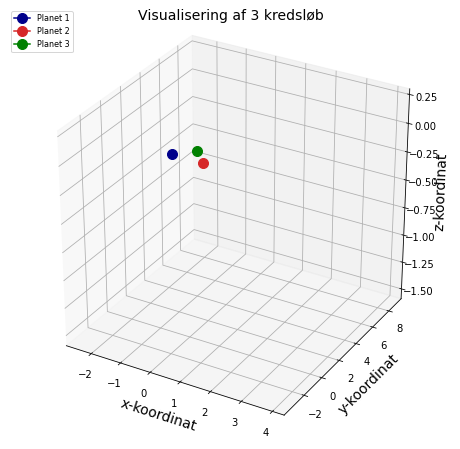

In [ ]:
# Create figure
fig = plt.figure(figsize=(8, 8))
 
# Create 3D axes
ax = fig.add_subplot(111, projection="3d")
 
# Initial orbits
planet1_orbit, = ax.plot(r1_sol[:,0], r1_sol[:,1], r1_sol[:,2], color="darkblue")
planet2_orbit, = ax.plot(r2_sol[:,0], r2_sol[:,1], r2_sol[:,2], color="tab:red")
planet3_orbit, = ax.plot(r3_sol[:,0], r3_sol[:,1], r3_sol[:,2], color="green")
 
# Plot final positions of the planets
planet1_final, = ax.plot(r1_sol[0:1,0], r1_sol[0:1,1], r1_sol[0:1,2], color="darkblue", marker="o", markersize=10, label="Planet 1")
planet2_final, = ax.plot(r2_sol[0:1,0], r2_sol[0:1,1], r2_sol[0:1,2], color="tab:red", marker="o", markersize=10, label="Planet 2")
planet3_final, = ax.plot(r3_sol[0:1,0], r3_sol[0:1,1], r3_sol[0:1,2], color="green", marker="o", markersize=10, label="Planet 3")
 
# Misc. plot details
ax.set_xlabel("x-koordinat", fontsize=14)
ax.set_ylabel("y-koordinat", fontsize=14)
ax.set_zlabel("z-koordinat", fontsize=14)
ax.set_title("Visualisering af 3 kredsløb\n", fontsize=14)
ax.legend(loc="upper left", fontsize=8)
 
# Create animation
anim = an.FuncAnimation(fig, update_points, frames = n, interval = 1)
 
# Export animation
writer = an.FFMpegWriter(fps = 30, bitrate=1800)
anim.save('ThreeBodyProblem.mp4', writer=writer)